# Importing all the primary and basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplt
from matplotlib import pyplot as plt
import seaborn as sns
import json
sns.set(color_codes=True)
from datetime import date

# Importing mode library to populate mode values of columns in dataframe
from statistics import mode

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os

# pd.set_option('display.float_format', lambda x: '%.5f' % x)

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Read data

In [2]:
housing_data=pd.read_csv('C:\\Users\\ankur\\OneDrive\\Ridhima\\AIML Course\\8. Capstone Project\\innercity.csv')
housing_data.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

# Create additional variables

In [4]:

def renovated_flag(x):
    if x>0:
        renovated=1
    else:
        renovated=0
    return renovated

def year_sold_2014_flag(x):
    if x == 2014:
        year_sold_2014=1
    else:
        year_sold_2014=0
    return year_sold_2014

def years_post_renovation(x,y):
    if x>0:
        num_years_post_renovation=y-x
    else:
        num_years_post_renovation=99
    return num_years_post_renovation

def neighbourhoods(x):
    neigh1=[98039,98004,98040,98112]
    neigh2=[98102,98109,98105,98006,98119,98005,98033,98199,98075]
    neigh3=[98074,98077,98053,98177,98008,98052,98122,98115,98116,98007,98027,98029]
    neigh4=[98144,98103,98024,98107,98117,98072,98136,98065,98034]
    neigh5=[98059,98011,98070,98125,98166,98028,98014,98045,98019,98126,98155,98010,98056,98118]
    neigh6=[98133,98038,98146,98108,98058,98092,98106,98022,98042,98178,98055,98198]
    neigh7=[98031,98030,98003,98188,98023,98148,98001,98032,98168,98002]
    if x in neigh1:
        neighbourhood_indicator=1
    elif x in neigh2:
        neighbourhood_indicator=2
    elif x in neigh3:
        neighbourhood_indicator=3
    elif x in neigh4:
        neighbourhood_indicator=4
    elif x in neigh5:
        neighbourhood_indicator=5
    elif x in neigh6:
        neighbourhood_indicator=6
    elif x in neigh7:
        neighbourhood_indicator=7
    else:
        neighbourhood_indicator=8
    return neighbourhood_indicator

housing_data['year_sold']=housing_data['dayhours'].astype(str).str[:4].astype(int)
housing_data['year_sold_2014_flag']=housing_data['year_sold'].apply(year_sold_2014_flag)
housing_data['renovated_flag']=housing_data['yr_renovated'].apply(renovated_flag)
housing_data['House_age_at_sales']=housing_data['year_sold']-housing_data['yr_built']
housing_data['num_years_post_renovation']=housing_data.apply(lambda x:years_post_renovation(x['yr_renovated'],x['year_sold']),axis=1)
housing_data['neighbourhood_indicator']=housing_data['zipcode'].apply(neighbourhoods)

# Rounding off ceil
housing_data['ceil']=housing_data['ceil'].round(0)

housing_data[['year_sold','dayhours','year_sold_2014_flag','renovated_flag','yr_renovated','yr_built','House_age_at_sales','num_years_post_renovation']].head()

,year_sold,dayhours,year_sold_2014_flag,renovated_flag,yr_renovated,yr_built,House_age_at_sales,num_years_post_renovation
0,2014,20141107T000000,1,0,0,1956,58,99
1,2014,20141204T000000,1,0,0,1976,38,99
2,2015,20150420T000000,0,0,0,2006,9,99
3,2014,20140529T000000,1,0,0,1916,98,99
4,2015,20150424T000000,0,0,0,1954,61,99


# Remove the unnecessary variables & split into Train & test before outlier treatment, multicollinearity checks etc.

In [5]:
housing_data=housing_data.drop(['dayhours','yr_renovated','cid','year_sold','yr_built','zipcode','lat','long'], axis=1)
train,test = train_test_split(housing_data, test_size = 0.30,random_state =2)
print(train['price'].mean())
print(test['price'].mean())

537119.7352766211
547327.6562307217


# Bedroom Treatment for Bedrooms=0

In [6]:
# There are 13 rows with 0 bedrooms. Assuming that these are data issues as few of the houses have bigger sizes.
# Bedrooms are highly correlated to living measure i.e. size of living area & hence, we will do missing 
# value treatment basis size of house
pd.DataFrame(train.corr())[['room_bed']].sort_values('room_bed',ascending=False)

,room_bed
room_bed,1.000000
living_measure,0.576242
room_bath,0.513459
ceil_measure,0.476171
living_measure15,0.390375
quality,0.354359
price,0.308247
basement,0.306734
furnished,0.260529
ceil,0.171982


In [7]:
# Find the average # of bedrooms by different living measure size
print('Mean bedrooms for 0-500 sq ft:     ',train[(train['living_measure']>0) & (train['living_measure']<=500) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 500-1000 sq ft:  ',train[(train['living_measure']>500) & (train['living_measure']<=1000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 1000-2000 sq ft: ',train[(train['living_measure']>1000) & (train['living_measure']<=2000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 2000-3000 sq ft: ',train[(train['living_measure']>2000) & (train['living_measure']<=3000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 3000-4000 sq ft: ',train[(train['living_measure']>3000) & (train['living_measure']<=4000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 4000-5000 sq ft: ',train[(train['living_measure']>4000) & (train['living_measure']<=5000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 5000-10000 sq ft:',train[(train['living_measure']>5000) & (train['living_measure']<=10000) & (train['room_bed']!=0)]['room_bed'].mean())
print('Mean bedrooms for 10000+ sq ft:    ',train[(train['living_measure']>10000) & (train['room_bed']!=0)]['room_bed'].mean())




Mean bedrooms for 0-500 sq ft:      1.25
Mean bedrooms for 500-1000 sq ft:   2.1795878312070656
Mean bedrooms for 1000-2000 sq ft:  3.0571825121443443
Mean bedrooms for 2000-3000 sq ft:  3.75089042530903
Mean bedrooms for 3000-4000 sq ft:  4.103295310519645
Mean bedrooms for 4000-5000 sq ft:  4.3984375
Mean bedrooms for 5000-10000 sq ft: 4.673469387755102
Mean bedrooms for 10000+ sq ft:     7.0


In [8]:
# Treat the rows with 0 bedrooms & create a new variable
def bedroom_treatment(x,y):
    if x>0:
        new_bedroom=x
    elif x == 0 and y<=500:
        new_bedroom=1
    elif x == 0 and y>500 and y<=1000:
        new_bedroom=2
    elif x == 0 and y>500 and y<=1000:
        new_bedroom=1
    elif x == 0 and y>1000 and y<=2000:
        new_bedroom=3
    elif x == 0 and y>2000 and y<=5000:
        new_bedroom=4
    elif x == 0 and y>5000 and y<=10000:
        new_bedroom=5
    elif x == 0 and y>10000:
        new_bedroom=7
    return new_bedroom

bedroom_treatment(0,6500)

train['num_bedrooms_treated']=train.apply(lambda x:bedroom_treatment(x['room_bed'],x['living_measure']),axis=1)
test['num_bedrooms_treated']=test.apply(lambda x:bedroom_treatment(x['room_bed'],x['living_measure']),axis=1)
train[train['room_bed']==0][['num_bedrooms_treated','room_bed','living_measure']]

,num_bedrooms_treated,room_bed,living_measure
21113,3.0,0,1490
15806,1.0,0,384
7317,3.0,0,1470
19216,4.0,0,3064
13422,3.0,0,1810
15960,3.0,0,1470
15102,1.0,0,390
1640,4.0,0,2290
11500,3.0,0,1430
8092,1.0,0,290


In [9]:
print(train.describe())

              price      room_bed     room_bath  living_measure   lot_measure  \
count  1.512900e+04  15129.000000  15129.000000     15129.00000  1.512900e+04   
mean   5.371197e+05      3.372596      2.108170      2074.09842  1.507751e+04   
std    3.593734e+05      0.939774      0.768823       913.74113  4.301053e+04   
min    7.800000e+04      0.000000      0.000000       290.00000  5.200000e+02   
25%    3.200000e+05      3.000000      1.500000      1420.00000  5.050000e+03   
50%    4.500000e+05      3.000000      2.250000      1910.00000  7.620000e+03   
75%    6.400000e+05      4.000000      2.500000      2550.00000  1.058800e+04   
max    6.890000e+06     33.000000      8.000000     13540.00000  1.651359e+06   

               ceil         coast         sight     condition       quality  \
count  15129.000000  15129.000000  15129.000000  15129.000000  15129.000000   
mean       1.529843      0.007535      0.234979      3.410206      7.644524   
std        0.554701      0.086481

# Remove outliers from train data
# Do the same treatment on test dataset too

In [10]:

train_new=train.drop('room_bed',axis=1)
test_new=test.drop('room_bed',axis=1)
final_subset1=train_new[(train_new['num_bedrooms_treated']<=8) & (train_new['num_bedrooms_treated']>0)]
final_subset2=final_subset1[final_subset1['room_bath']<=6]
final_subset3=final_subset2[final_subset2['ceil']<=3]
train_fin=final_subset3[final_subset3['lot_measure']<=final_subset3.lot_measure.quantile(0.99)]
print(final_subset3.lot_measure.quantile(0.99))
print(train_fin.price.count())


final_subset1_t=test_new[(test_new['num_bedrooms_treated']<=8) & (test_new['num_bedrooms_treated']>0)]
final_subset2_t=final_subset1_t[final_subset1_t['room_bath']<=6]
final_subset3_t=final_subset2_t[final_subset2_t['ceil']<=3]
test_fin=final_subset3_t[final_subset3_t['lot_measure']<=212137]
print(test_fin.price.count())

212137.0
14955
6412


# Find variables with high multicollinearity

In [11]:

df_col_corr=train_fin.corr()
df_col_corr["2nd Col"]=df_col_corr.index
df_col_corr.reset_index(inplace = True)
df_col_corr.drop('index', axis=1, inplace = True)
df_relevant_corr=pd.DataFrame(columns = ["1st Col", "2nd Col"])
df_relevant_corr=df_relevant_corr[0:0]
col_num=len(df_col_corr.columns)
print("For {} columns, correlation will be derived".format(col_num))
#Counter will help us to analysis only the value below the diagonal to avoid duplicate co-relations
counter = 0
for col in df_col_corr.columns:
    if col !="2nd Col":
        
        # Only those pairs are captured which have correlation between 0.4 to 1 and -1 and -0.4
        
        temp_corr_df=df_col_corr.iloc[counter:,[counter,col_num-1]][((df_col_corr[col] >= 0.40) & (df_col_corr[col] < 1.0)) |
        ((df_col_corr[col] > -1.0) & (df_col_corr[col] <= -0.4))]
        
        #Renaming the column as Corr. Correlation have columnnames in index and column headers
        temp_corr_df.rename(columns={col:"Corr"}, inplace=True)
        temp_corr_df["1st Col"]=col
        df_relevant_corr=df_relevant_corr.append(temp_corr_df)
        counter+=1
# Displaying top 20 results sorted on +ve correlation
df_relevant_corr.sort_values(['Corr'], ascending = False).head(20)

For 22 columns, correlation will be derived


,1st Col,2nd Col,Corr
14,lot_measure,total_area,0.998976
9,living_measure,ceil_measure,0.871200
13,quality,furnished,0.785505
11,living_measure,living_measure15,0.762202
8,living_measure,quality,0.760711
12,lot_measure,lot_measure15,0.756589
14,lot_measure15,total_area,0.756420
9,quality,ceil_measure,0.755491
2,room_bath,living_measure,0.750424
11,ceil_measure,living_measure15,0.736485


In [12]:
df_relevant_corr.sort_values(['Corr'], ascending = False).tail(20)

,1st Col,2nd Col,Corr
20,living_measure,num_bedrooms_treated,0.602733
9,price,ceil_measure,0.599564
11,price,living_measure15,0.591657
13,price,furnished,0.576131
11,room_bath,living_measure15,0.567061
20,room_bath,num_bedrooms_treated,0.528597
1,price,room_bath,0.521129
20,ceil_measure,num_bedrooms_treated,0.497409
9,ceil,ceil_measure,0.492096
13,room_bath,furnished,0.481271


# Basis their correlation with price, identify the ones with lower correlation with price & drop them

In [13]:

# train_fin[['lot_measure','total_area','price','living_measure','ceil_measure','living_measure15','quality','furnished','lot_measure','lot_measure15','renovated_flag','num_years_post_renovation']].corr()['price']
train_fin[['price','lot_measure','total_area','living_measure','ceil_measure','renovated_flag','num_years_post_renovation']].corr()['price']
# drop
# lot_measure
# ceil_measure
# renovated_flag

price                        1.000000
lot_measure                  0.106445
total_area                   0.137458
living_measure               0.694686
ceil_measure                 0.599564
renovated_flag               0.115400
num_years_post_renovation   -0.121724
Name: price, dtype: float64

# Drop the variables with high multi-correlation

In [14]:

train_post_corr=train_fin.drop(['lot_measure','ceil_measure','renovated_flag'],axis=1)
test_post_corr=test_fin.drop(['lot_measure','ceil_measure','renovated_flag'],axis=1)

# Create x_train,x_test, y_train & y_test & scale the independent variables

In [15]:

x_train=train_post_corr.drop(['price'], axis=1) 
y_train=train_post_corr[['price']]


x_test=test_post_corr.drop(['price'], axis=1) 
y_test=test_post_corr[['price']]

stdscaler=StandardScaler()
x_train_scaled=pd.DataFrame(stdscaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(stdscaler.transform(x_test),columns=x_test.columns)

# Apply Polynomial with degree=2 on the dataset & run regression

In [16]:


poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

poly_clf = LinearRegression()
poly_clf.fit(x_train_poly, y_train)
print(poly_clf.score(x_train_poly, y_train))
print(poly_clf.score(x_test_poly, y_test))
y_test_pred=poly_clf.predict(x_test_poly)
    
accuracy6=pd.DataFrame({'Model':['Lin Reg+Poly=2 scaled vars+Price dep '],
     'R-square- Train':[round(poly_clf.score(x_train_poly, y_train),2)],
     'R-square- Test':[round(poly_clf.score(x_test_poly, y_test),2)],
     'MSE':[round(mean_squared_error(y_test, y_test_pred),2)],
     'RMSE':[round(sqrt(mean_squared_error(y_test, y_test_pred)),2)]})
accuracy6

0.8512083285777952
0.8354155238341483


,Model,R-square- Train,R-square- Test,MSE,RMSE
0,Lin Reg+Poly=2 scaled vars+Price dep,0.85,0.84,2.299943e+10,151655.63


# Perform Cross-validation

In [19]:
num_folds = 20
kfold = KFold(n_splits=num_folds, random_state=1, shuffle=True)
results = cross_val_score(poly_clf, x_test_poly, y_test, cv=kfold)
print(results)
print('-------------------------------------------')
print("R-square Mean & Standard Deviation:" , (results.mean().round(3), results.std().round(3)))
print('-------------------------------------------')
print("In 68% cases, R-square will be between" , (results.mean().round(3)-results.std().round(3)).round(3)," & ",(results.mean().round(3)+results.std().round(3)).round(3))

[0.85086123 0.79879901 0.79826509 0.84361352 0.78695054 0.89797053
 0.76360983 0.7946646  0.85396094 0.84453243 0.84520957 0.87607761
 0.78021736 0.8647621  0.87771316 0.82261851 0.76380103 0.79292273
 0.81190328 0.84336245]
-------------------------------------------
R-square Mean & Standard Deviation: (0.826, 0.039)
-------------------------------------------
In 68% cases, R-square will be between 0.787  &  0.865


# Testing Few assumptions on the final model

In [20]:
# ASSUMPTION 1: MEAN OF RESIDUALS SHOULD BE CLOSE TO ZERO
y_train_pred=poly_clf.predict(x_train_poly)
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals on Train",round(mean_residuals,5))

# FINDING: Mean of Residual on Train is zero

Mean of Residuals on Train 0.0


In [21]:
y_test_pred=poly_clf.predict(x_test_poly)
residuals_test = y_test.values-y_test_pred
mean_residuals_test = np.mean(residuals_test)
print("Mean of Residuals on Test",round(mean_residuals_test,5))

# FINDING: Mean of Residual on test is close to zero. Since prices are 6+ digits, this number is not very high

Mean of Residuals on Test 913.38359


Text(0, 0.5, 'y_pred')

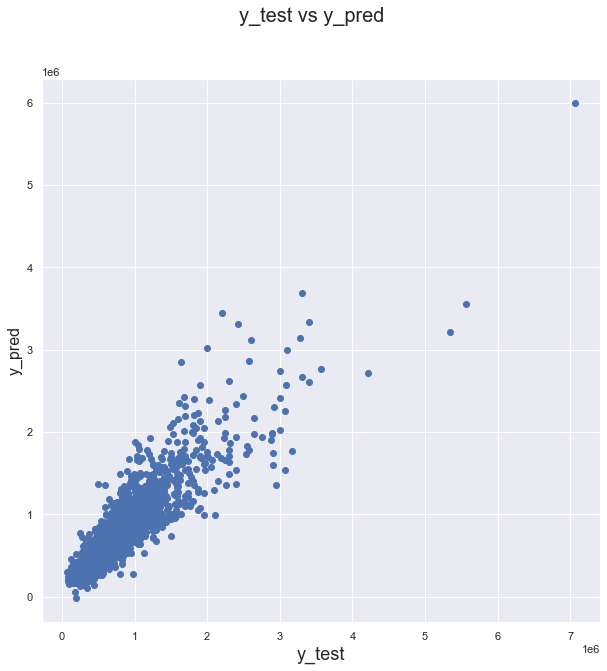

In [22]:
# CHECK 2: Actuals & Predicted should be in a straight diagonal line

fig = plt.figure(figsize=[10,10])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# Finding: The Predicted Y get dispersed for higher prices. 

Text(0.5, 0, 'Errors')

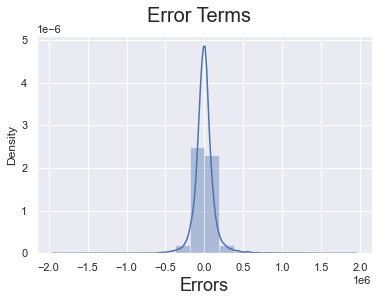

In [23]:
# REsiduals are normally distributed for Train dataset

fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

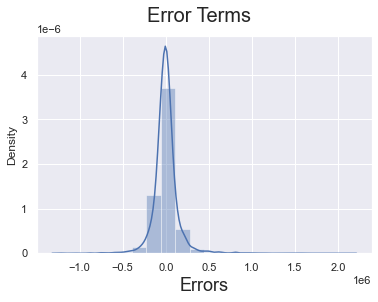

In [24]:
# REsiduals are normally distributed for Test dataset

fig = plt.figure()
sns.distplot((residuals_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [25]:
# HOMOSCEDASTICITY CHECK FOR TRAIN
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)
# Since p value is more than 0.05 in Goldfeld Quandt Test,
# we can't reject it's null hypothesis that error terms are homoscedastic. 


[('F statistic', 0.9315778262869743), ('p-value', 0.9988950982137249)]

In [26]:
# HOMOSCEDASTICITY CHECK FOR TEST

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals_test, x_test)
lzip(name, test)
# Since p value is more than 0.05 in Goldfeld Quandt Test,
# we can't reject it's null hypothesis that error terms in Test are homoscedastic. 

[('F statistic', 1.0207943464842235), ('p-value', 0.2805969021974677)]

(14955, 1)
(14955, 1)


Text(0.5, 1.0, 'Residuals vs fitted values plot for autocorrelation check')

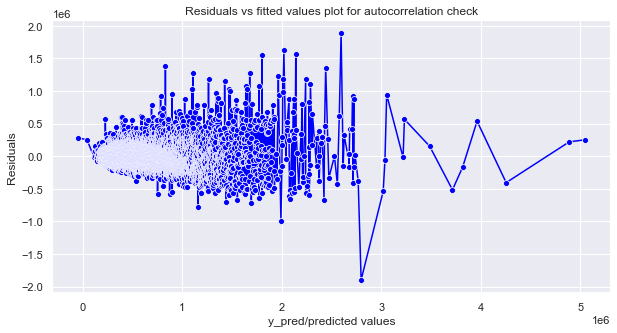

In [27]:
# Detecting heteroscedasticity in TRAIN!
# Graphical Method: plot the error terms against the predicted values( Yi^).     
    
residuals_df=pd.DataFrame(residuals,columns=['Residuals'])
print(residuals_df.shape)
residuals_df.head()

y_train_pred_df=pd.DataFrame(y_train_pred,columns=['Predicted Train Y'])
print(y_train_pred_df.shape)
y_train_pred_df.head()


plt.figure(figsize=(10,5))
sns.lineplot(x=y_train_pred_df['Predicted Train Y'],y=residuals_df['Residuals'],marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-100000,100000)
# plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='red')
plt.title('Residuals vs fitted values plot for autocorrelation check')

# While the results state that heteroscedasticity is not there, there seems to be some pattern in residuals 
# as the dispersion is higher for higher prices 

(6412, 1)
(6412, 1)


Text(0.5, 1.0, 'Residuals vs fitted values plot for autocorrelation check')

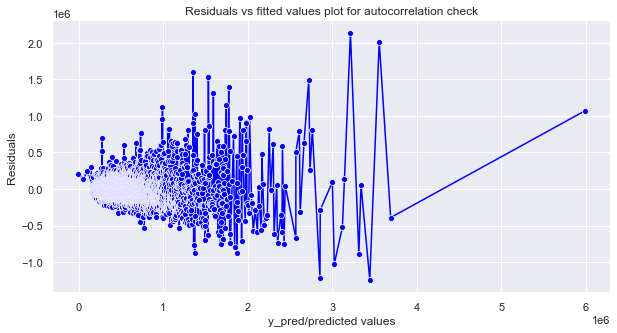

In [28]:
# Detecting heteroscedasticity in TEST!
# Graphical Method: plot the error terms against the predicted values( Yi^). 
    
    
residuals_df=pd.DataFrame(residuals_test,columns=['Residuals'])
print(residuals_df.shape)
residuals_df.head()

y_test_pred_df=pd.DataFrame(y_test_pred,columns=['Predicted Test Y'])
print(y_test_pred_df.shape)
y_test_pred_df.head()


plt.figure(figsize=(10,5))
sns.lineplot(x=y_test_pred_df['Predicted Test Y'],y=residuals_df['Residuals'],marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-100000,100000)
# plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='red')
plt.title('Residuals vs fitted values plot for autocorrelation check')

# While the results state that heteroscedasticity is not there, there seems to be some pattern in residuals 
# as the dispersion is higher for higher prices.

# FINAL CONCLUSION

 Our final model is polynomial regression with degree2 on scaled variables. 
 
 - The model R square on Train is high at 0.85 & R square on Test is also similar at 0.84. 
 - The cross-validation exercise also lends a degree of confidence as the mean r square is 0.82 with a standard deviation of 0.039. Given this, R-square will be between 0.787  &  0.865 in 68% cases. 
 
 Upon testing the assumptions, most of the assumptions (other than autocorrelation check) hold true. 
 
 If we had more time, we would have liked to explore other models (including deep learning models) to solve for this. For actual implementation, we would also like to pickle the model & create a user friendly interface.